In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
    
# https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho


In [2]:
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
print(df.isnull().sum())
# no null values

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [6]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [7]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [8]:
df = df.drop_duplicates()

df.reset_index(drop=True, inplace=True)

In [9]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
3572,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
3573,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
3574,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
3575,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [10]:
df['name'].unique().shape

# not sure if i need to drop or not, lets keep it first, if correlation testing indicates that it doesnt matter then drop

(1491,)

In [11]:
# Leave one out encoding

# use leave one out encoding because of high cardinality 

from category_encoders import LeaveOneOutEncoder

loo_encoder = LeaveOneOutEncoder(cols=['name'])
df = loo_encoder.fit_transform(df, df['selling_price'])

#df = df.drop(['name'],axis=1)

In [12]:
df['transmission'].unique().shape
df['transmission'].unique()

# binary encoding for this one

array(['Manual', 'Automatic'], dtype=object)

In [13]:
label_encoder = LabelEncoder()

df['transmission'] = label_encoder.fit_transform(df['transmission'])

In [14]:
df['seller_type'].unique().shape
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [15]:
df['seller_type'].unique().shape
df['seller_type'].unique()

# hot one encoding for this one

df = pd.get_dummies(df, columns=['seller_type'], drop_first=False)

#df['seller_type'] = label_encoder.fit_transform(df['seller_type'])

In [16]:
df['owner'].unique().shape
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [17]:
df['owner'].unique().shape
df['owner'].unique()


ordinal_encoder = OrdinalEncoder(categories=[['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car']])

df['owner_encoded'] = ordinal_encoder.fit_transform(df[['owner']])

df.drop('owner', axis=1, inplace=True)

In [18]:
df['fuel'].unique().shape
df['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [19]:
df['fuel'].unique().shape
df['fuel'].unique()

# hot one encoding for this one

df = pd.get_dummies(df, columns=['fuel'], drop_first=False)

#df['fuel'] = label_encoder.fit_transform(df['fuel'])

In [20]:
# feature engineer
# age is created using the current year today. then subtracting their current year

from datetime import datetime

current_year = datetime.now().year
df.insert(0, "age", current_year - df["year"])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577 entries, 0 to 3576
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           3577 non-null   int64  
 1   name                          3577 non-null   float64
 2   year                          3577 non-null   int64  
 3   selling_price                 3577 non-null   int64  
 4   km_driven                     3577 non-null   int64  
 5   transmission                  3577 non-null   int64  
 6   seller_type_Dealer            3577 non-null   bool   
 7   seller_type_Individual        3577 non-null   bool   
 8   seller_type_Trustmark Dealer  3577 non-null   bool   
 9   owner_encoded                 3577 non-null   float64
 10  fuel_CNG                      3577 non-null   bool   
 11  fuel_Diesel                   3577 non-null   bool   
 12  fuel_Electric                 3577 non-null   bool   
 13  fue

In [22]:
df[['seller_type_Dealer', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
   'fuel_CNG', 'fuel_Diesel', 'fuel_Electric', 'fuel_LPG', 'fuel_Petrol']] = df[['seller_type_Dealer', 
   'seller_type_Individual', 'seller_type_Trustmark Dealer', 'fuel_CNG', 
   'fuel_Diesel', 'fuel_Electric', 'fuel_LPG', 'fuel_Petrol']].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577 entries, 0 to 3576
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           3577 non-null   int64  
 1   name                          3577 non-null   float64
 2   year                          3577 non-null   int64  
 3   selling_price                 3577 non-null   int64  
 4   km_driven                     3577 non-null   int64  
 5   transmission                  3577 non-null   int64  
 6   seller_type_Dealer            3577 non-null   int64  
 7   seller_type_Individual        3577 non-null   int64  
 8   seller_type_Trustmark Dealer  3577 non-null   int64  
 9   owner_encoded                 3577 non-null   float64
 10  fuel_CNG                      3577 non-null   int64  
 11  fuel_Diesel                   3577 non-null   int64  
 12  fuel_Electric                 3577 non-null   int64  
 13  fue

In [23]:
df

,age,name,year,selling_price,km_driven,transmission,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,owner_encoded,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol
0,17,1.013158e+05,2007,60000,70000,1,0,1,0,0.0,0,0,0,0,1
1,17,1.428000e+05,2007,135000,50000,1,0,1,0,0.0,0,0,0,0,1
2,12,4.729164e+05,2012,600000,100000,1,0,1,0,0.0,0,1,0,0,0
3,7,2.149998e+05,2017,250000,46000,1,0,1,0,0.0,0,0,0,0,1
4,10,5.291667e+05,2014,450000,141000,1,0,1,0,1.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3572,10,3.612500e+05,2014,409999,80000,1,0,1,0,1.0,0,1,0,0,0
3573,10,4.739125e+05,2014,409999,80000,1,0,1,0,1.0,0,1,0,0,0
3574,15,8.260000e+04,2009,110000,83000,1,0,1,0,1.0,0,0,0,0,1
3575,8,1.191250e+06,2016,865000,90000,1,0,1,0,0.0,0,1,0,0,0


In [24]:
df.describe()

,age,name,year,selling_price,km_driven,transmission,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,owner_encoded,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol
count,3577.000000,3.577000e+03,3577.000000,3.577000e+03,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.00000,3577.000000,3577.000000
mean,11.037462,4.385704e+05,2012.962538,4.739125e+05,69250.545709,0.912776,0.199049,0.791725,0.009226,0.516914,0.010344,0.503215,0.00028,0.006150,0.480011
std,4.251759,3.339947e+05,4.251759,5.093018e+05,47579.940016,0.282202,0.399341,0.406131,0.095619,0.770910,0.101192,0.500060,0.01672,0.078194,0.499670
min,4.000000,3.000000e+04,1992.000000,2.000000e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,8.000000,2.390169e+05,2010.000000,2.000000e+05,36000.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,11.000000,4.700000e+05,2013.000000,3.500000e+05,60000.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
75%,14.000000,4.900000e+05,2016.000000,6.000000e+05,90000.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000
max,32.000000,4.800000e+06,2020.000000,8.900000e+06,806599.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.00000,1.000000,1.000000


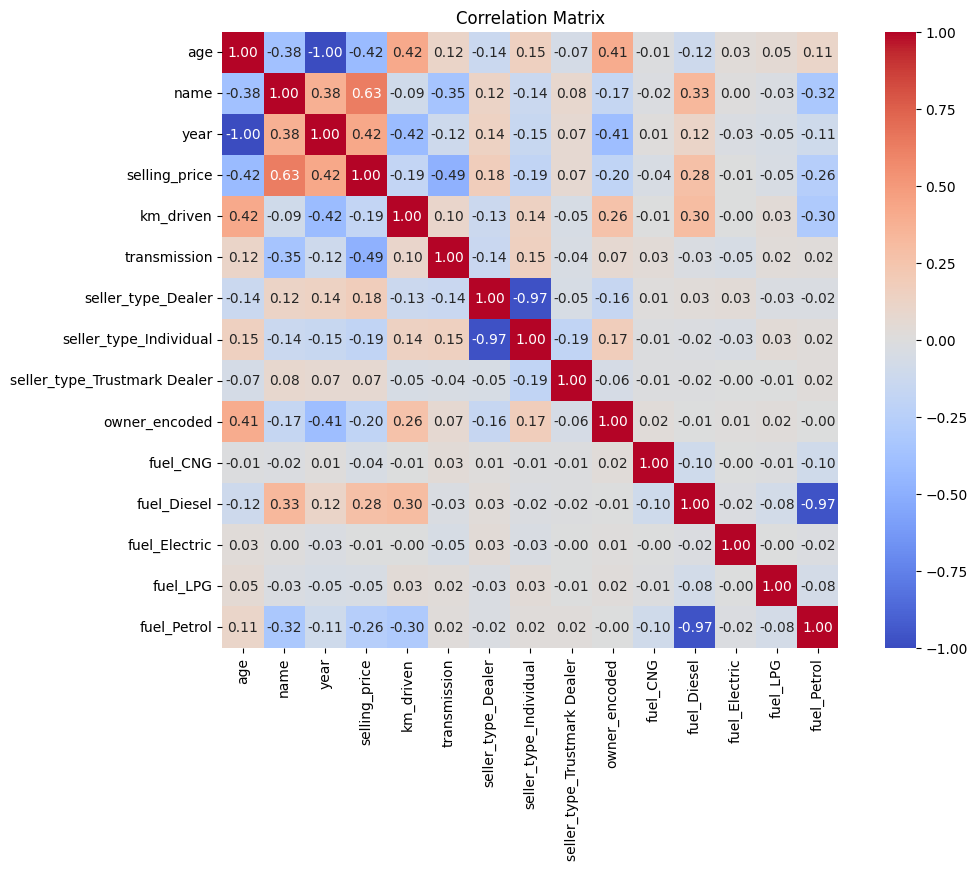

In [25]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [26]:
price_correlation = correlation_matrix['selling_price'].sort_values(ascending=False)
print(price_correlation)

# very high correlation in name. if causing overfitting then drop

selling_price                   1.000000
name                            0.632349
year                            0.424260
fuel_Diesel                     0.276873
seller_type_Dealer              0.175024
seller_type_Trustmark Dealer    0.066012
fuel_Electric                  -0.005383
fuel_CNG                       -0.040303
fuel_LPG                       -0.046668
km_driven                      -0.187359
seller_type_Individual         -0.187640
owner_encoded                  -0.201091
fuel_Petrol                    -0.261443
age                            -0.424260
transmission                   -0.486269
Name: selling_price, dtype: float64


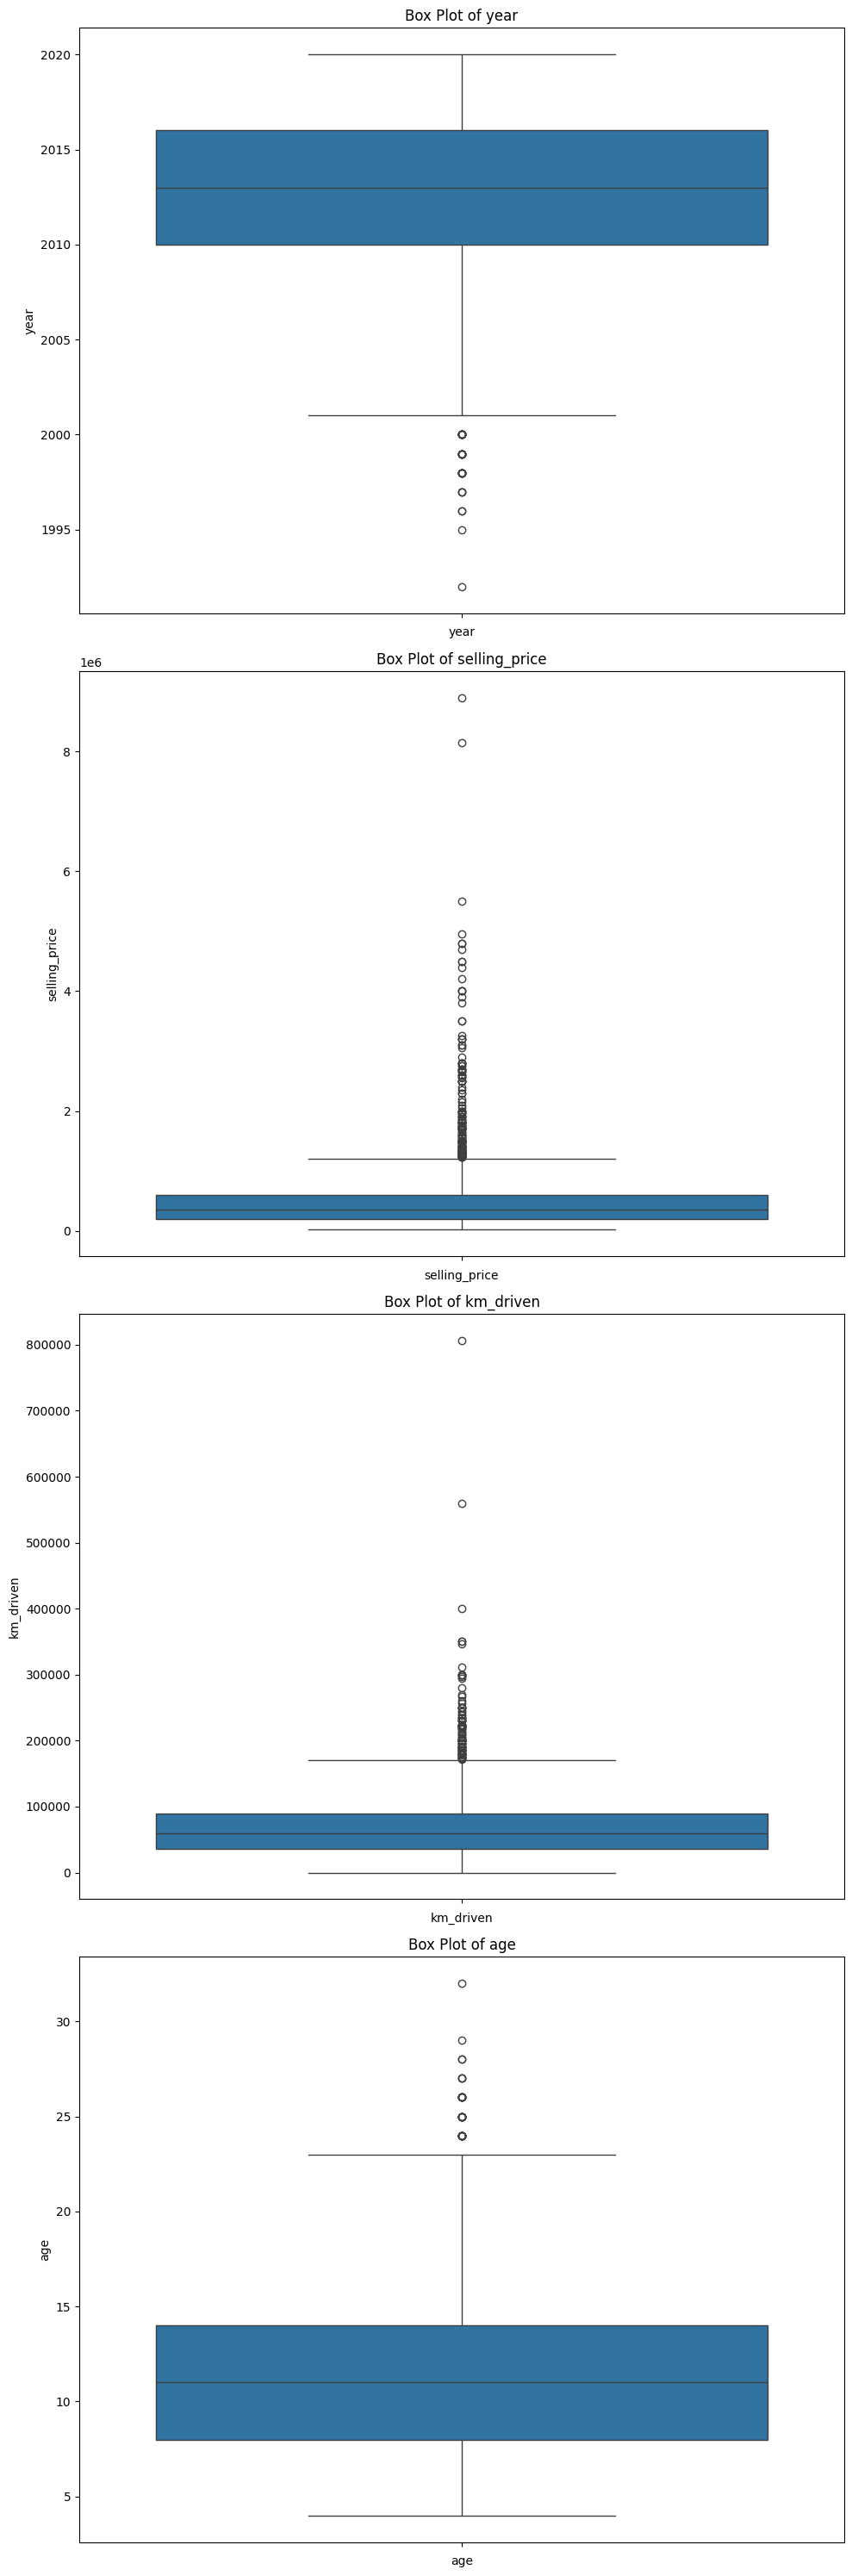

In [27]:
numerical_columns = ['year', 'selling_price', 'km_driven','age']

plt.figure(figsize=(10, 30))

for i, column in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 1, i + 1)
    sns.boxplot(df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [28]:
df.shape

(3577, 15)

In [29]:
# a lot of outliers in km_driven and selling price

# removing outliers with interquatile range rule

columns = ['km_driven', 'selling_price', 'age']

for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    cleaned_data = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    

In [30]:
cleaned_data.shape

(3540, 15)

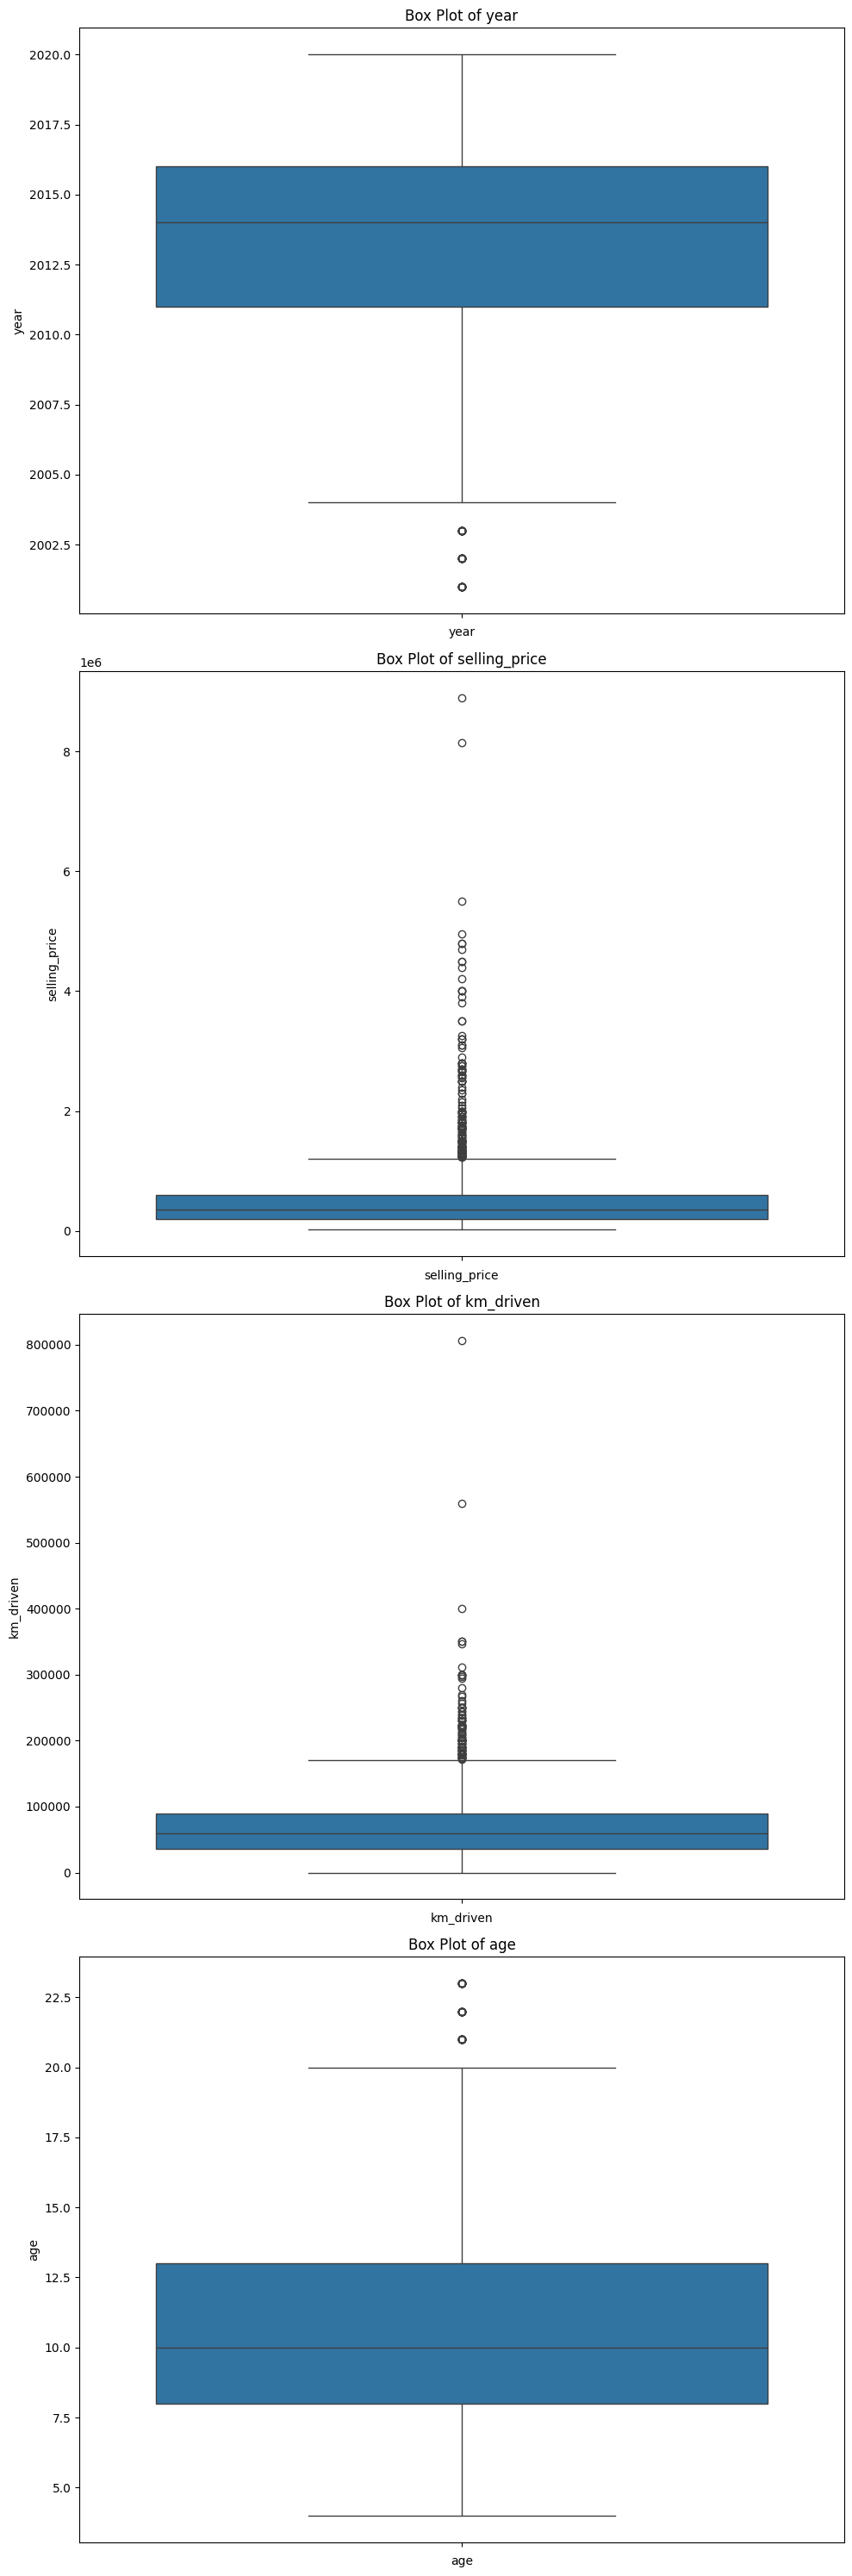

In [31]:
numerical_columns = ['year', 'selling_price', 'km_driven', 'age']

plt.figure(figsize=(10, 30))

for i, column in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 1, i + 1)
    sns.boxplot(cleaned_data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

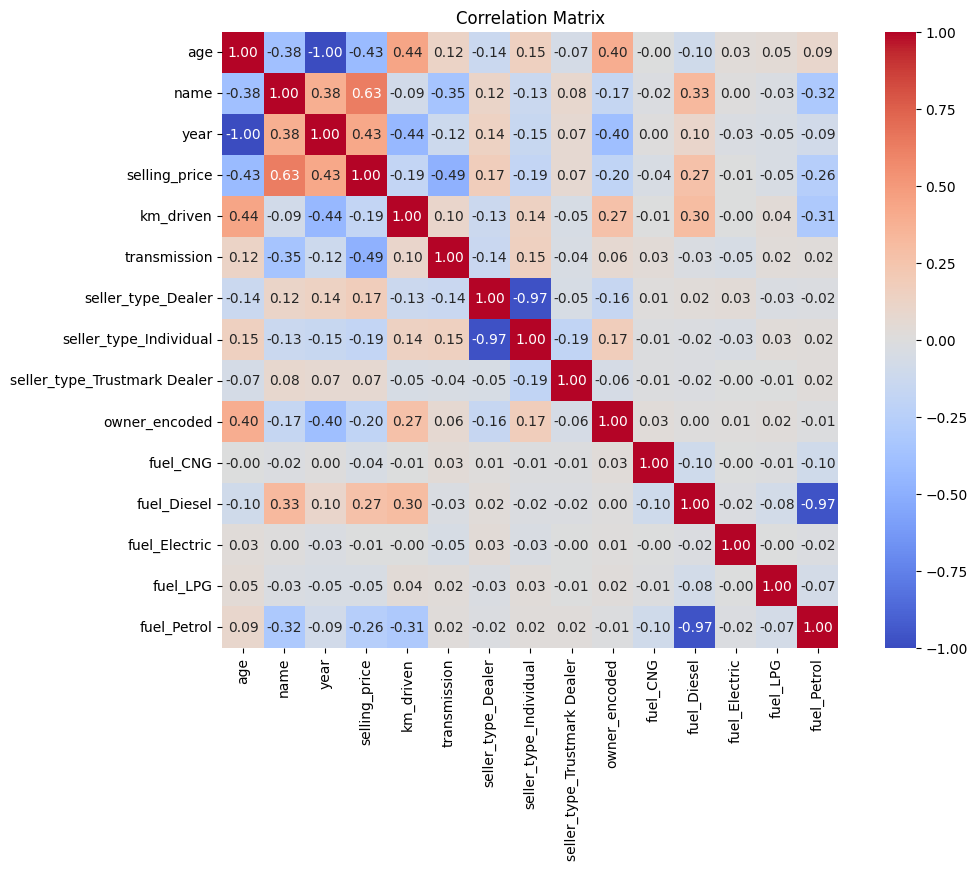

In [32]:
correlation_matrix = cleaned_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [33]:
price_correlation = correlation_matrix['selling_price'].sort_values(ascending=False)
print(price_correlation)

selling_price                   1.000000
name                            0.631368
year                            0.427254
fuel_Diesel                     0.273230
seller_type_Dealer              0.173436
seller_type_Trustmark Dealer    0.065500
fuel_Electric                  -0.005526
fuel_CNG                       -0.041204
fuel_LPG                       -0.045436
seller_type_Individual         -0.185995
km_driven                      -0.187431
owner_encoded                  -0.195975
fuel_Petrol                    -0.257949
age                            -0.427254
transmission                   -0.486911
Name: selling_price, dtype: float64


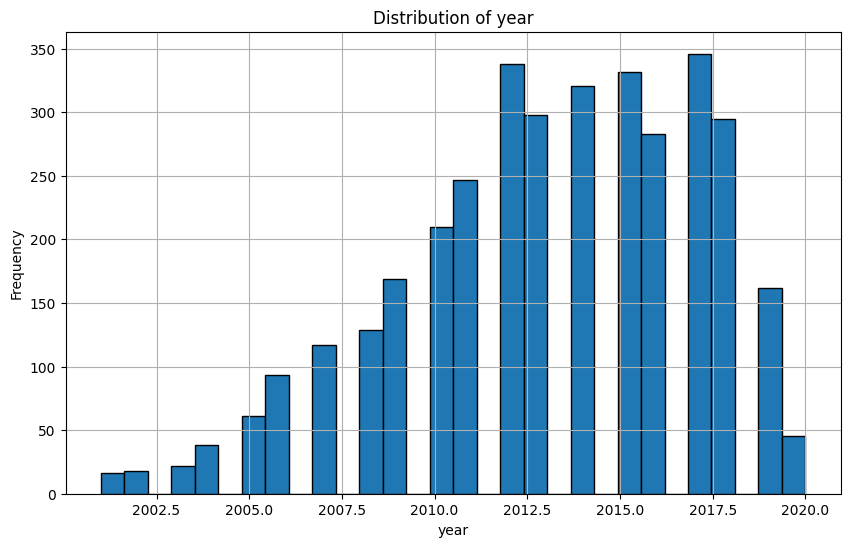

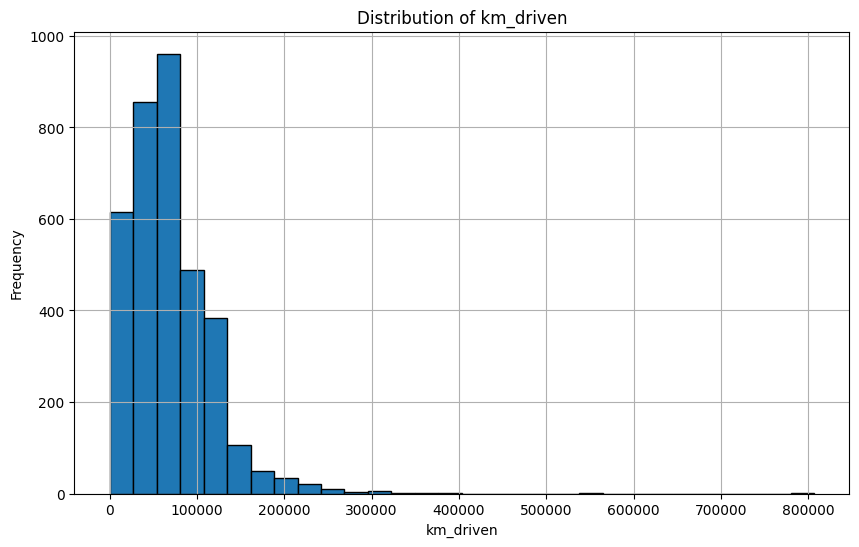

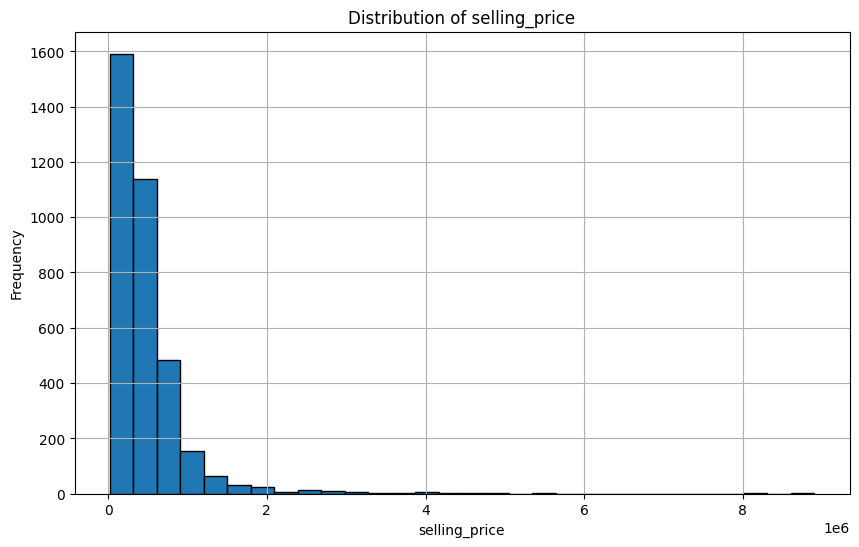

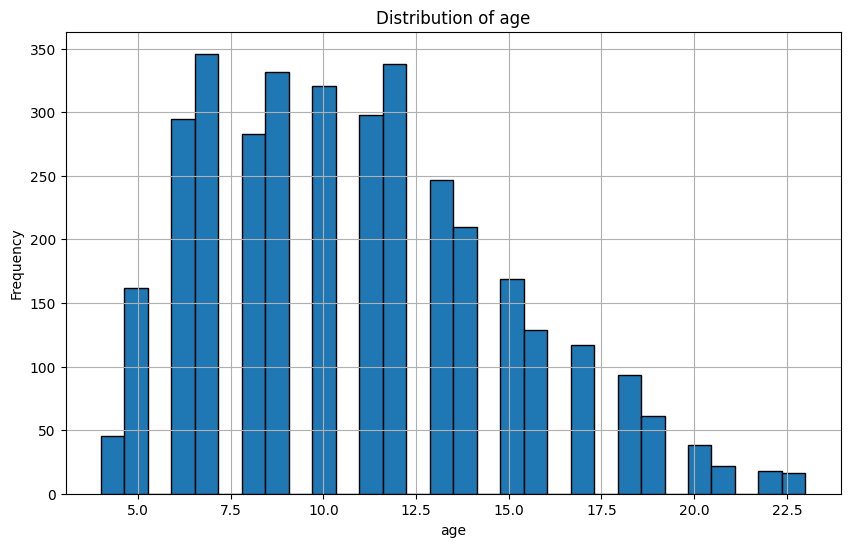

In [34]:
original_numerical_columns = ['year', 'km_driven', 'selling_price', 'age']

for col in original_numerical_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(cleaned_data[col], bins=30, edgecolor='k')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

# dataset is skewed i think it will be fixed when i normalize before training

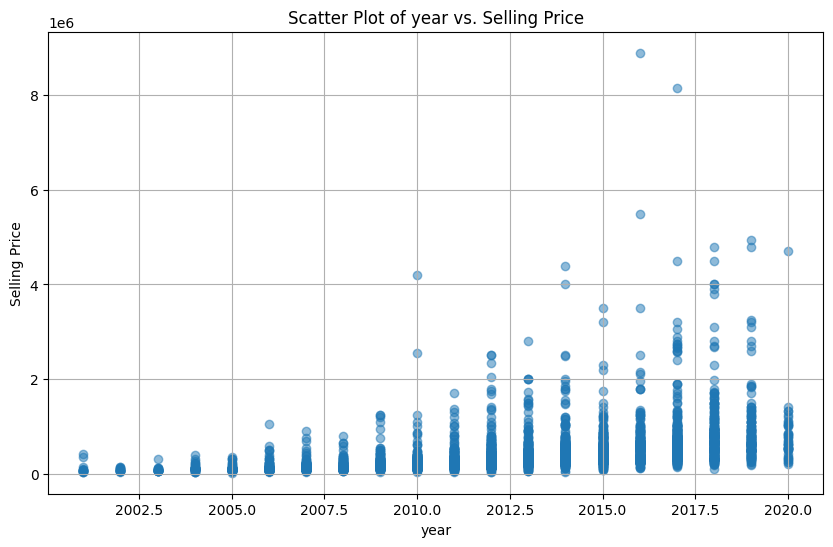

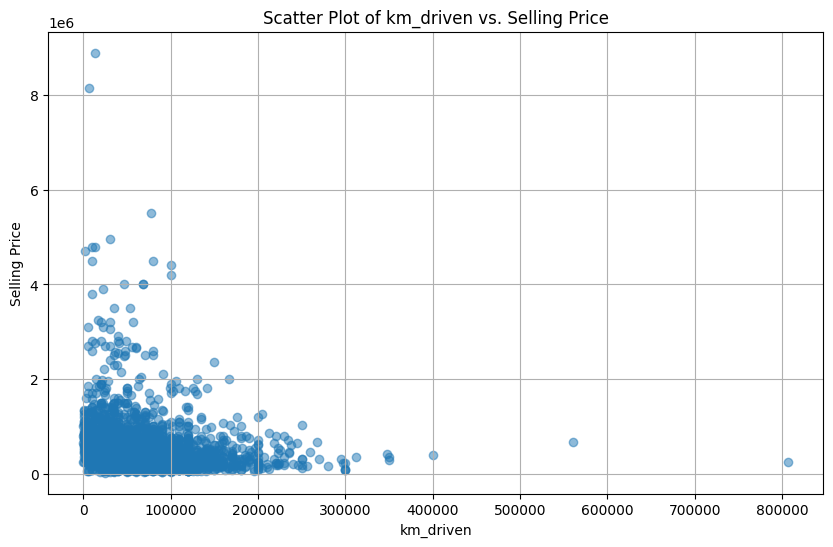

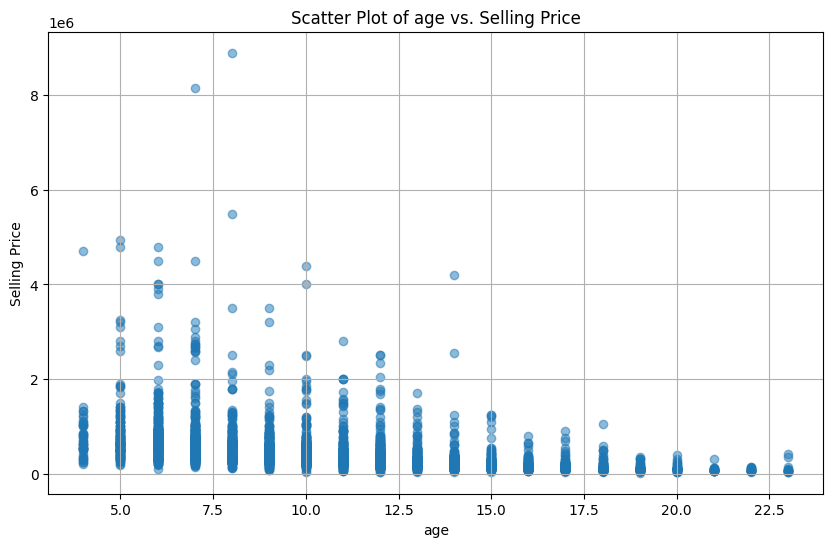

In [35]:
for col in original_numerical_columns:
    if col != 'selling_price':
        plt.figure(figsize=(10, 6))
        plt.scatter(cleaned_data[col], cleaned_data['selling_price'], alpha=0.5)
        plt.title(f'Scatter Plot of {col} vs. Selling Price')
        plt.xlabel(col)
        plt.ylabel('Selling Price')
        plt.grid()
        plt.show()

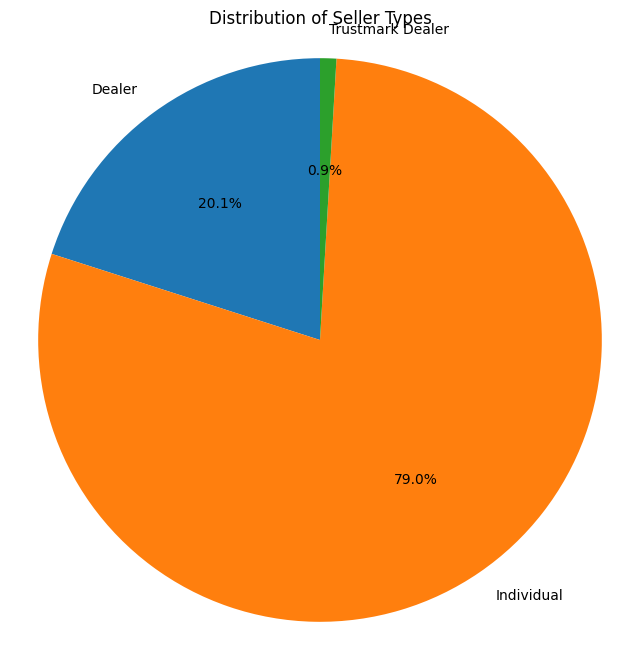

In [36]:
seller_type_counts = (
    cleaned_data['seller_type_Dealer'].sum(), 
    cleaned_data['seller_type_Individual'].sum(), 
    cleaned_data['seller_type_Trustmark Dealer'].sum()
)
seller_type_labels = ['Dealer', 'Individual', 'Trustmark Dealer']

# Create a pie chart for seller types
plt.figure(figsize=(8, 8))
plt.pie(seller_type_counts, labels=seller_type_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Seller Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

First Owner: 62.5%
Second Owner: 27.1%
Third Owner: 8.0%
Fourth & Above Owner: 1.9%
Test Drive Car: 0.5%


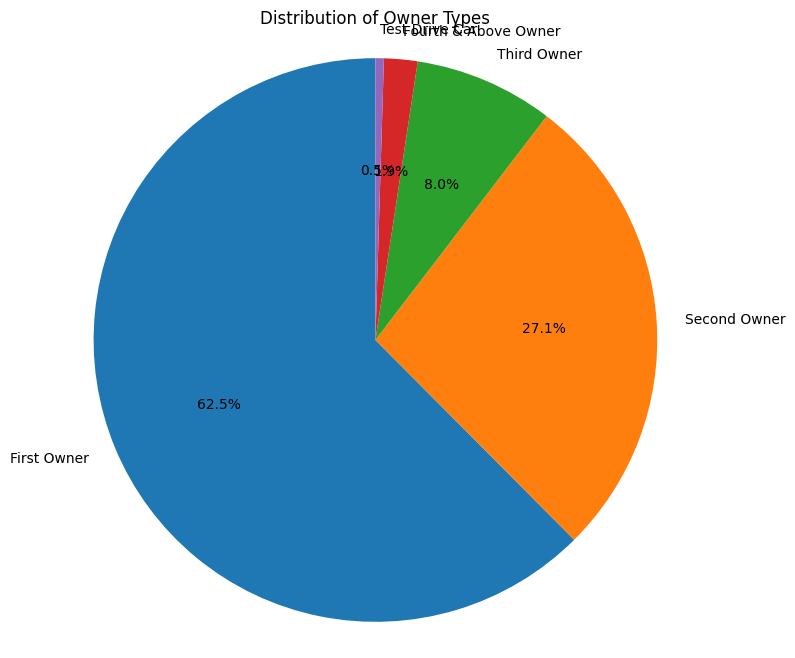

In [45]:
owner_categories = ['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car']

owner_mapping = {i: owner for i, owner in enumerate(owner_categories)}

owner_counts = cleaned_data['owner_encoded'].value_counts()

owner_labels = [owner_mapping[i] for i in owner_counts.index]

total_counts = owner_counts.sum()
for label, count in zip(owner_labels, owner_counts):
    percentage = (count / total_counts) * 100
    print(f"{label}: {percentage:.1f}%")

plt.figure(figsize=(8, 8))
plt.pie(owner_counts, labels=owner_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Owner Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

fuel_CNG: 1.0%
fuel_Diesel: 50.7%
fuel_Electric: 0.0%
fuel_LPG: 0.6%
fuel_Petrol: 47.6%


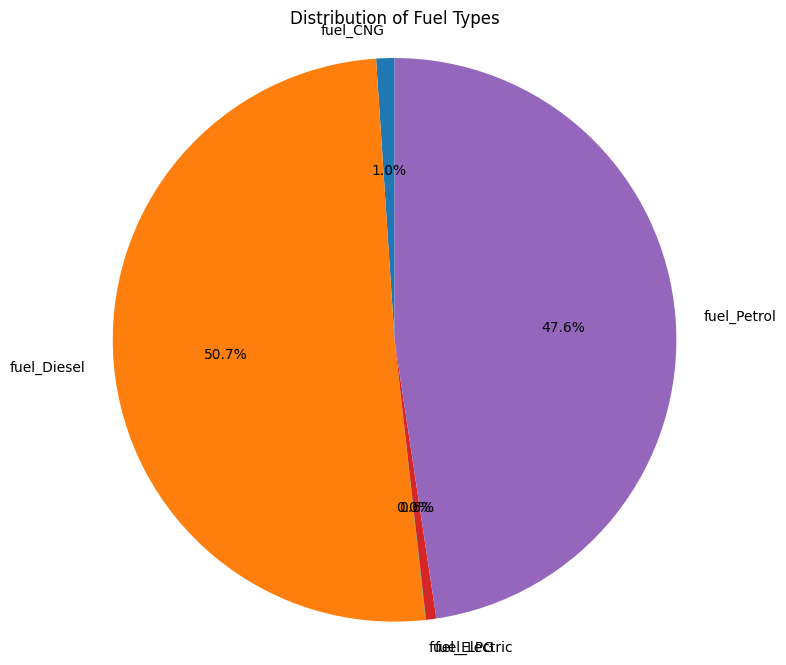

In [46]:
fuel_counts = cleaned_data[['fuel_CNG', 'fuel_Diesel', 'fuel_Electric', 'fuel_LPG', 'fuel_Petrol']].sum()

total_fuel_counts = fuel_counts.sum()
for fuel_type, count in fuel_counts.items():
    percentage = (count / total_fuel_counts) * 100
    print(f"{fuel_type}: {percentage:.1f}%")

plt.figure(figsize=(8, 8))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Fuel Types')
plt.axis('equal')
plt.show()

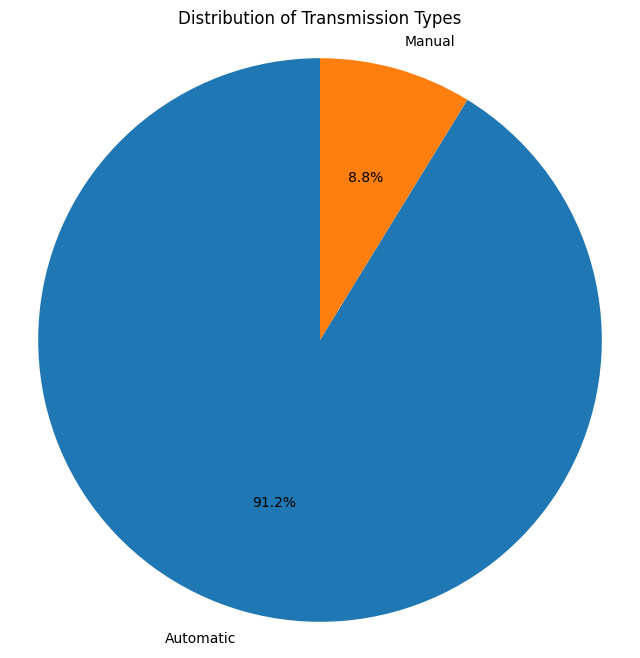

In [39]:
transmission_counts = cleaned_data['transmission'].value_counts()

transmission_labels = label_encoder.inverse_transform([0, 1])

plt.figure(figsize=(8, 8))
plt.pie(transmission_counts, labels=transmission_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Transmission Types')
plt.axis('equal')
plt.show()

In [40]:
# feature selection
# year and age is redundant. their correlation is literally the opposite of each other

# drop year

cleaned_data.drop('year', axis=1, inplace=True)

#df.drop('age', axis=1, inplace=True)

C:\Users\kelvi\AppData\Local\Temp\ipykernel_17492\1124852955.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.drop('year', axis=1, inplace=True)


In [41]:
cleaned_data

,age,name,selling_price,km_driven,transmission,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,owner_encoded,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol
0,17,1.013158e+05,60000,70000,1,0,1,0,0.0,0,0,0,0,1
1,17,1.428000e+05,135000,50000,1,0,1,0,0.0,0,0,0,0,1
2,12,4.729164e+05,600000,100000,1,0,1,0,0.0,0,1,0,0,0
3,7,2.149998e+05,250000,46000,1,0,1,0,0.0,0,0,0,0,1
4,10,5.291667e+05,450000,141000,1,0,1,0,1.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3572,10,3.612500e+05,409999,80000,1,0,1,0,1.0,0,1,0,0,0
3573,10,4.739125e+05,409999,80000,1,0,1,0,1.0,0,1,0,0,0
3574,15,8.260000e+04,110000,83000,1,0,1,0,1.0,0,0,0,0,1
3575,8,1.191250e+06,865000,90000,1,0,1,0,0.0,0,1,0,0,0


In [42]:
#cleaned_data.to_csv('cleaned_dataset.csv', index=False)

In [43]:
cleaned_data.describe()

,age,name,selling_price,km_driven,transmission,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,owner_encoded,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol
count,3540.000000,3.540000e+03,3.540000e+03,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000
mean,10.885876,4.408154e+05,4.777351e+05,69224.841525,0.912429,0.200565,0.790113,0.009322,0.508192,0.010452,0.507062,0.000282,0.005932,0.476271
std,4.001833,3.345137e+05,5.103250e+05,47736.578361,0.282709,0.400480,0.407285,0.096113,0.763457,0.101714,0.500021,0.016807,0.076803,0.499507
min,4.000000,3.000000e+04,2.000000e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,2.399934e+05,2.000000e+05,35981.250000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,4.727082e+05,3.500000e+05,60000.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,13.000000,4.904164e+05,6.000000e+05,90000.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,23.000000,4.800000e+06,8.900000e+06,806599.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
